# Installation

Use this to calbrate the zero-value, by recoding several runs of the flow-sensor-monitor.py with CVS output and with NO pressure or flow.

In [4]:
# Set this to how long there's zero-data before there's non-zero data - example: '3s' for 3 seconds
clip_length_seconds = '2.9s'

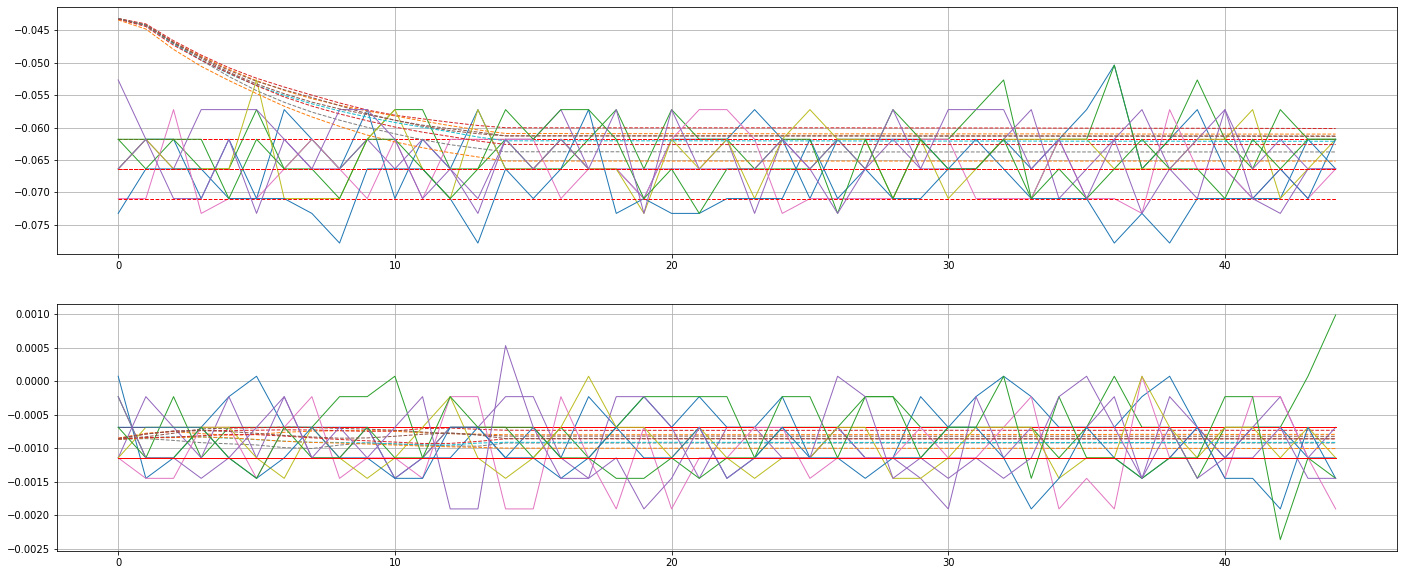

In [16]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 1

import glob
csv_files = sorted(glob.glob("./cal-v32.2-2020-06-29-*.csv"))

fig, ax = plt.subplots(2, 1, figsize=[24, 10])
new_ks = []
dfs = []
prs_zeros = []
flow_prs_zeros = []

n = 0

for file_name in csv_files:

    # Read in the file, and shift it to the start of the test
    df = pd.read_csv(file_name, sep="\t")

    # Trim everything before 3 samples before flow goes over 10slm
    # fist_sample_index = df[abs(df['flow']) > 10].index[0]

    # df = df[:fist_sample_index]

    # start the ms counter at the beginning of the kept region
    df['ms'] = pd.to_timedelta(df['ms'], unit='s')
    first_ms = df['ms'][0]
    df['ms'] = df['ms'] - first_ms

    # keep only 4 seconds
    first_index_past_4_seconds = df[df['ms'] > pd.to_timedelta(clip_length_seconds)].index[0]+2
    df = df[:first_index_past_4_seconds]

    # Compute the volume - step 1, ms per sample
    # ms_diff = df['ms'] - df.shift(1, fill_value=0)['ms']
    ms_diff = df['ms'].diff()/pd.to_timedelta('1m')

    prs_zero = df['pressure_raw'].median()
    prs_zeros.append(prs_zero)
    df['avg_prs_raw'] = prs_zero

    flow_prs_zero = df['flow_raw'].median()
    flow_prs_zeros.append(flow_prs_zero)
    df['flow_avg_prs_raw'] = flow_prs_zero

    df['pressure_raw'].plot(ax=ax[0], label=f'Pressure Raw {n}', style='-', grid=True, figsize=[24, 10])
    df['avg_prs_raw'].plot(ax=ax[0], label=f'Pressure avg {n}', style='r--', grid=True, figsize=[24, 10])
    df['pressure_zero'].plot(ax=ax[0], label=f'Pressure Raw {n}', style='--', grid=True, figsize=[24, 10])

    df['flow_raw'].plot(ax=ax[1], label=f'flow_Pressure Raw {n}', style='-', grid=True, )
    df['flow_avg_prs_raw'].plot(ax=ax[1], label=f'flow_Pressure avg {n}', style='r-', grid=True, figsize=[24, 10])
    df['flow_zero'].plot(ax=ax[1], label=f'z {n}', style='--', grid=True, figsize=[24, 10])
    # ax = df.plot(ax=ax, x='ms', y=['avg_prs_raw'], label=[f'Pressure avg {n}'], grid=True, figsize=[24, 10])

    dfs.append(df)

    n += 1

In [8]:
pd.Series(prs_zeros).median()

-0.06637699999999999

In [9]:
pd.Series(flow_prs_zeros).median()

-0.001144